<a href="https://colab.research.google.com/github/SawsanYusuf/The_Price_of_Netflix_Stocks/blob/main/Netflix_Stock's_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Stock's Performance Analysis 2017-2022

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 7.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
# Load libraries
import math
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import time

import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pytz
import statsmodels.api as sm
import inspect
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

## Prepare

### Import Data

In [ ]:
#Get the stock quote
df_stocks = web.DataReader('NFLX', data_source='yahoo' )
#show the data
print(df_stocks.shape)
df_stocks

(1259, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-09,199.399994,196.559998,199.100006,196.869995,6971700,196.869995
2017-10-10,198.300003,192.100006,197.850006,195.080002,6233800,195.080002
2017-10-11,196.220001,193.809998,195.570007,194.949997,6450200,194.949997
2017-10-12,198.619995,194.710007,196.750000,195.860001,7753300,195.860001
2017-10-13,200.820007,197.190002,199.699997,199.490005,12081300,199.490005
...,...,...,...,...,...,...
2022-10-03,241.539993,232.850006,237.850006,239.039993,8657400,239.039993
2022-10-04,245.800003,233.250000,244.839996,240.740005,13925900,240.740005
2022-10-05,241.589996,227.380005,238.759995,236.729996,10825600,236.729996


In [ ]:
df_stocks.drop(columns = ["Volume","Adj Close"], inplace = True)
#show the data
print(df_stocks.shape)
df_stocks

(1259, 4)


,High,Low,Open,Close
Date,,,,
2017-10-09,199.399994,196.559998,199.100006,196.869995
2017-10-10,198.300003,192.100006,197.850006,195.080002
2017-10-11,196.220001,193.809998,195.570007,194.949997
2017-10-12,198.619995,194.710007,196.750000,195.860001
2017-10-13,200.820007,197.190002,199.699997,199.490005
...,...,...,...,...
2022-10-03,241.539993,232.850006,237.850006,239.039993
2022-10-04,245.800003,233.250000,244.839996,240.740005
2022-10-05,241.589996,227.380005,238.759995,236.729996


## Data Understanding

In [ ]:
# Basic informations
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-10-09 to 2022-10-07
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1259 non-null   float64
 1   Low     1259 non-null   float64
 2   Open    1259 non-null   float64
 3   Close   1259 non-null   float64
dtypes: float64(4)
memory usage: 49.2 KB


In [ ]:
df_stocks.describe()

,High,Low,Open,Close
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,389.529102,377.274289,383.597474,383.549086
std,125.581580,123.262494,124.570287,124.333944
min,172.059998,162.710007,163.960007,166.369995
25%,298.980011,289.449997,294.994995,294.169998
50%,367.329987,356.619995,361.959991,361.809998
75%,502.895004,487.770004,495.000000,494.455002
max,700.989990,686.090027,692.349976,691.690002


## Data Cleaning

In [ ]:
# Missing values
df_stocks.isnull().sum() / len(df_stocks)

High     0.0
Low      0.0
Open     0.0
Close    0.0
dtype: float64

In [ ]:
# Duplicates
df_stocks.duplicated().sum()

0

## Data Exploring Using Visualization

### NFLX Stock Prices General Trend

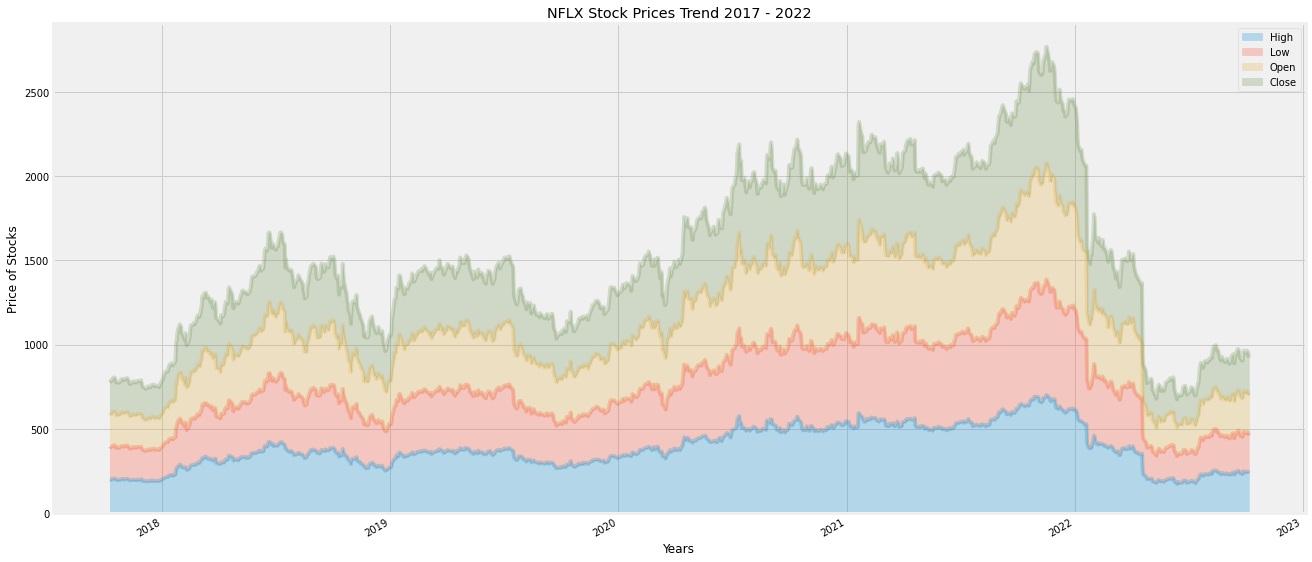

In [ ]:
df_stocks.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             figsize=(20, 10),
            )

plt.title('NFLX Stock Prices Trend 2017 - 2022')
plt.ylabel('Price of Stocks')
plt.xlabel('Years')

plt.show()

In [74]:
fig = px.line(df_stocks, labels= {"value": "Price"}, title="NFLX Stock Prices")
fig.show()

### Individual Feature Patterns

In [ ]:
df_2017= df_stocks.loc["2017"].copy()
df_2018= df_stocks.loc["2018"].copy()
df_2019= df_stocks.loc["2019"].copy()
df_2020= df_stocks.loc["2020"].copy()
df_2021= df_stocks.loc["2021"].copy()
df_2022= df_stocks.loc["2022"].copy()

#### High Price Feature

In [ ]:
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("2017 Stock's High Prices", "2018 Stock's High Prices", "2019 Stock's High Prices", "2020 Stock's High Prices", "2021 Stock's High Prices", "2022 Stock's High Prices"))

fig.add_trace(go.Scatter(x=df_2017.index, y=df_2017["High"], name="2017"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_2018.index, y=df_2018["High"], name="2018"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_2019.index, y=df_2019["High"], name="2019"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_2020.index, y=df_2020["High"], name="2020"),
              row=2, col=2)

fig.add_trace(go.Scatter(x=df_2021.index, y=df_2021["High"], name="2021"),
              row=3, col=1)

fig.add_trace(go.Scatter(x=df_2022.index, y=df_2022["High"], name="2022"),
              row=3, col=2)

fig.update_layout(height=1000, width=1000,
                  title_text="NFLX Stock's High Prices 2017-2022")

fig.show()

#### Low Price Feature

In [ ]:
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("2017 Stock's Low Prices", "2018 Stock's Low Prices", "2019 Stock's Low Prices", "2020 Stock's Low Prices", "2021 Stock's Low Prices", "2022 Stock's Low Prices"))

fig.add_trace(go.Scatter(x=df_2017.index, y=df_2017["Low"], name="2017"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_2018.index, y=df_2018["Low"], name="2018"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_2019.index, y=df_2019["Low"], name="2019"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_2020.index, y=df_2020["Low"], name="2020"),
              row=2, col=2)

fig.add_trace(go.Scatter(x=df_2021.index, y=df_2021["Low"], name="2021"),
              row=3, col=1)

fig.add_trace(go.Scatter(x=df_2022.index, y=df_2022["Low"], name="2022"),
              row=3, col=2)

fig.update_layout(height=1000, width=1000,
                  title_text="NFLX Stock's Low Prices 2017-2022")

fig.show()

#### Open Price Feature

In [ ]:
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("2017 Stock's Open Prices", "2018 Stock's Open Prices", "2019 Stock's Open Prices", "2020 Stock's Open Prices", "2021 Stock's Open Prices", "2022 Stock's Open Prices"))

fig.add_trace(go.Scatter(x=df_2017.index, y=df_2017["Open"], name="2017"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_2018.index, y=df_2018["Open"], name="2018"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_2019.index, y=df_2019["Open"], name="2019"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_2020.index, y=df_2020["Open"], name="2020"),
              row=2, col=2)

fig.add_trace(go.Scatter(x=df_2021.index, y=df_2021["Open"], name="2021"),
              row=3, col=1)

fig.add_trace(go.Scatter(x=df_2022.index, y=df_2022["Open"], name="2022"),
              row=3, col=2)

fig.update_layout(height=1000, width=1000,
                  title_text="NFLX Stock's Open Prices 2017-2022")

fig.show()

#### Close Price Feature

In [ ]:
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("2017 Stock's Close Prices", "2018 Stock's Close Prices", "2019 Stock's Close Prices", "2020 Stock's Close Prices", "2021 Stock's Close Prices", "2022 Stock's Close Prices"))

fig.add_trace(go.Scatter(x=df_2017.index, y=df_2017["Close"], name="2017"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_2018.index, y=df_2018["Close"], name="2018"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_2019.index, y=df_2019["Close"], name="2019"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_2020.index, y=df_2020["Close"], name="2020"),
              row=2, col=2)

fig.add_trace(go.Scatter(x=df_2021.index, y=df_2021["Close"], name="2021"),
              row=3, col=1)

fig.add_trace(go.Scatter(x=df_2022.index, y=df_2022["Close"], name="2022"),
              row=3, col=2)

fig.update_layout(height=1000, width=1000,
                  title_text="NFLX Stock's Close Prices 2017-2022")

fig.show()

### NFLX Stocks Price's Change Over Years

#### 2017

In [ ]:
fig = px.line(df_2017, labels= {"value": "Price"}, title="NFLX Stock Prices 2017")
fig.show()

In [ ]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("High Prices 2017", "Low Prices 2017", "Open Prices 2017", "Close Prices 2017"))

fig.add_trace(go.Scatter(x=df_2017.index, y=df_2017["High"], name="High"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_2017.index, y=df_2017["Low"], name="Low"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_2017.index, y=df_2017["Open"], name="Open"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_2017.index, y=df_2017["Close"], name="Close"),
              row=2, col=2)


fig.update_layout(height=1000, width=1000,
                  title_text="NFLX STOCK'S PERFORMANCES 2017")

fig.show()

#### 2018

In [75]:
fig = px.line(df_2018, labels= {"value": "Price"}, title="NFLX Stock Prices 2018")
fig.show()

In [76]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("High Prices 2018", "Low Prices 2018", "Open Prices 2018", "Close Prices 2018"))

fig.add_trace(go.Scatter(x=df_2018.index, y=df_2018["High"], name="High"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_2018.index, y=df_2018["Low"], name="Low"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_2018.index, y=df_2018["Open"], name="Open"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_2018.index, y=df_2018["Close"], name="Close"),
              row=2, col=2)


fig.update_layout(height=1000, width=1000,
                  title_text="NFLX STOCK'S PERFORMANCES 2018")

fig.show()

#### 2019

In [77]:
fig = px.line(df_2019, labels= {"value": "Price"}, title="NFLX Stock Prices 2019")
fig.show()

In [78]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("High Prices 2019", "Low Prices 2019", "Open Prices 2019", "Close Prices 2019"))

fig.add_trace(go.Scatter(x=df_2019.index, y=df_2019["High"], name="High"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_2019.index, y=df_2019["Low"], name="Low"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_2019.index, y=df_2019["Open"], name="Open"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_2019.index, y=df_2019["Close"], name="Close"),
              row=2, col=2)


fig.update_layout(height=1000, width=1000,
                  title_text="NFLX STOCK'S PERFORMANCES 2019")

fig.show()

#### 2020

In [79]:
fig = px.line(df_2020, labels= {"value": "Price"}, title="NFLX Stock Prices 2020")
fig.show()

In [80]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("High Prices 2020", "Low Prices 2020", "Open Prices 2020", "Close Prices 2020"))

fig.add_trace(go.Scatter(x=df_2020.index, y=df_2020["High"], name="High"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_2020.index, y=df_2020["Low"], name="Low"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_2020.index, y=df_2020["Open"], name="Open"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_2020.index, y=df_2020["Close"], name="Close"),
              row=2, col=2)


fig.update_layout(height=1000, width=1000,
                  title_text="NFLX STOCK'S PERFORMANCES 2020")

fig.show()

#### 2021

In [81]:
fig = px.line(df_2021, labels= {"value": "Price"}, title="NFLX Stock Prices 2021")
fig.show()

In [82]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("High Prices 2021", "Low Prices 2021", "Open Prices 2021", "Close Prices 2021"))

fig.add_trace(go.Scatter(x=df_2021.index, y=df_2021["High"], name="High"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_2021.index, y=df_2021["Low"], name="Low"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_2021.index, y=df_2021["Open"], name="Open"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_2021.index, y=df_2021["Close"], name="Close"),
              row=2, col=2)


fig.update_layout(height=1000, width=1000,
                  title_text="NFLX STOCK'S PERFORMANCES 2021")

fig.show()

#### 2022

In [ ]:
fig = px.line(df_2022, labels= {"value": "Price"}, title="NFLX Stock Prices 2022")
fig.show()

In [83]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("High Prices 2022", "Low Prices 2022", "Open Prices 2022", "Close Prices 2022"))

fig.add_trace(go.Scatter(x=df_2022.index, y=df_2022["High"], name="High"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_2022.index, y=df_2022["Low"], name="Low"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_2022.index, y=df_2022["Open"], name="Open"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_2022.index, y=df_2022["Close"], name="Close"),
              row=2, col=2)


fig.update_layout(height=1000, width=1000,
                  title_text="NFLX STOCK'S PERFORMANCES 2022")

fig.show()